In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mf = pd.read_csv("/Users/nikkichaudhary/Downloads/Titanic-Dataset.csv")

In [3]:
mf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
mf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
mf.drop('Cabin', axis=1, inplace=True)

In [8]:
mf['Age'].mean()

np.float64(29.69911764705882)

In [9]:
mf.fillna(30,inplace=True)

In [10]:
mf['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
mf['Sex']=mf['Sex'].map({'male':0, 'female':1})
mf['Embarked']=mf['Embarked'].fillna('S')
mf['Embarked']=mf['Embarked'].map({'S':0,'C':1,'Q':2})


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = mf[['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']]
Y = mf['Survived']

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier()

In [17]:
rfc.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
Y_pred = rfc.predict(X_test)

In [19]:
Y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy = accuracy_score(Y_test, Y_pred)

In [22]:
('accuracy:',accuracy)

('accuracy:', 0.7982062780269058)

In [23]:
('accuracy:', 0.7982062780269058)

('accuracy:', 0.7982062780269058)

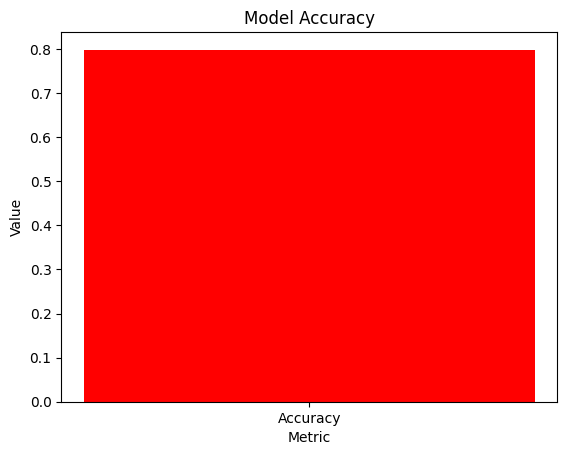

In [24]:
labels = ['Accuracy']
values = [accuracy]
plt.bar(labels,values,color= 'red')
plt.title('Model Accuracy') 
plt.xlabel('Metric') 
plt.ylabel('Value')
plt.show()

In [25]:
new_data = pd.DataFrame({
    'Pclass':[1,2,3],
    'Sex':[0,1,0],
    'Age':[20,30,40],
    'SibSp':[0,1,2],
    'Parch':[0,1,2],
    'Fare':	[100,200,300]})
predictions = rfc.predict(new_data)
('Prediction:',predictions)

('Prediction:', array([0, 1, 0]))

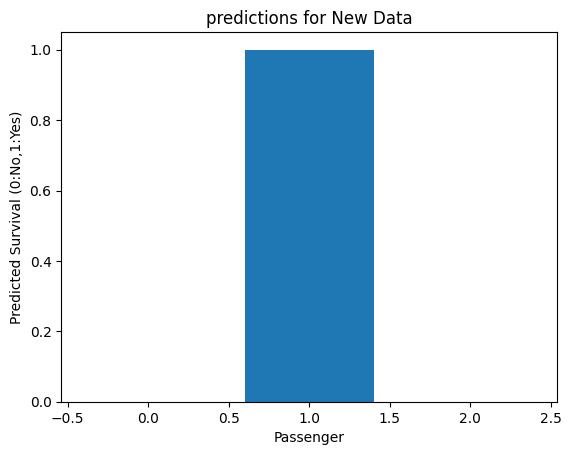

In [27]:
plt.bar(range(len(predictions)),predictions)
plt.title('predictions for New Data') 
plt.xlabel('Passenger') 
plt.ylabel('Predicted Survival (0:No,1:Yes)') 
plt.show()

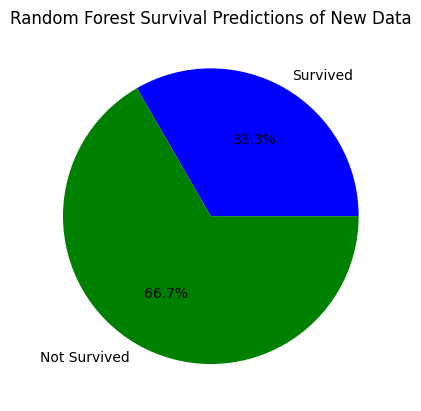

In [28]:
labels = ['Survived','Not Survived']
sizes = [len(predictions[predictions ==1]),len(predictions[predictions ==0])]
colors=['blue','green']
plt.pie(sizes,labels=labels, autopct='%1.1f%%',colors=colors)
plt.title('Random Forest Survival Predictions of New Data')
plt.show()